<a href="https://colab.research.google.com/github/AgentKitik/Docs/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22DFT_new_points_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
A = [10, 10, 50]
Q=4
N=32
S=[[None for n in range(N)] for k in range(Q)]
f = [4/N, 12.5/N, 0] 

for k in range(Q):
    f[2]=(1.3+k)*2/N
    for n in range(N):
        S[k][n]=( A[0]*np.exp(complex(0, 2*np.pi*f[0]*n))
                + A[1]*np.exp(complex(0, 2*np.pi*f[1]*n))
                + A[2]*np.exp(complex(0, 2*np.pi*f[2]*n))
                )

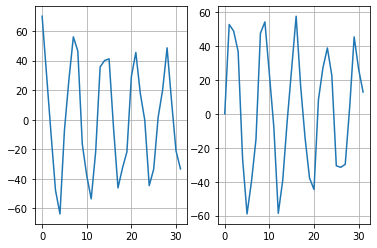

In [130]:
times=np.linspace(0, N-1, N)

fig = plt.figure()

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.plot(times,[x.real for x in S[1]])
ax_1.grid(axis = 'both')

ax_2.plot(times,[x.imag for x in S[1]])
ax_2.grid(axis = 'both')

plt.show()

In [131]:
power_of_noize = min(A[0], A[1])
noise_real = np.random.normal(0, power_of_noize, size=(Q, N))
noize_imag = np.random.normal(0, power_of_noize, size=(Q, N))
noize_imag=noize_imag*1j
matrix=S +noise_real+noize_imag

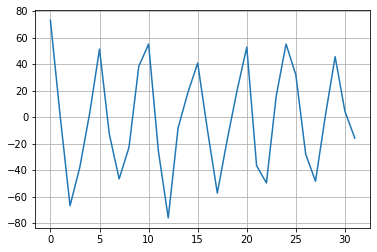

In [132]:
plt.plot(times, matrix[2].real)
plt.grid(axis = 'both')
plt.show()

In [133]:
F_S = np.zeros((Q, N), complex)
#преобразование Фурье
for k in range(Q):
    for p in range(N):
        F_S[k][p]=np.dot(matrix[k],[np.exp((-2)*np.pi*1j*p*n/N) for n in range(N)])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


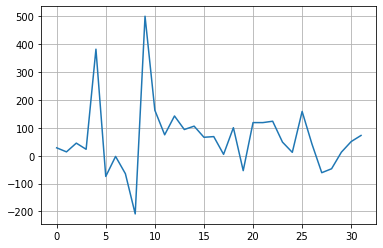

In [134]:
plt.plot(times, F_S[3])
plt.grid()
plt.show()

In [135]:
sum_FS=np.zeros((N, 1), complex)
for n in range(N):
    for k in range(Q):
        sum_FS[n]+=F_S[k][n]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


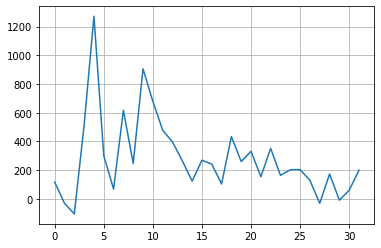

In [136]:
plt.plot(times, sum_FS)
plt.grid()
plt.show()

In [137]:
#p - число новых точек
def graph_approx(x, y, p):
  x_new=np.linspace(0, len(x)-1, p)
  y_new=np.zeros((p,), complex)
  j=0
  i=0
  while j<(p-1):
    if x_new[j]<x[i+1]:
      y_new[j]=y[i]+(y[i+1]-y[i])*(x_new[j]-x[i])
      j+=1
    else:
      i+=1
  y_new[p-1]=y[-1]
  x_new_new=np.linspace(0, p-1, p)
  return x_new_new, y_new

In [138]:
m=64

In [139]:
x_new, y_new=graph_approx(times, matrix[2], m)

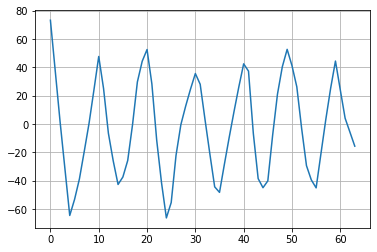

In [140]:
plt.plot(x_new, y_new.real)
plt.grid(axis = 'both')
plt.show()

In [141]:
#увеличим количество ячеек везде 
matrix_new=[]
for k in range(Q):
  matrix_new.append(graph_approx(times, matrix[k], m)[1])

M_new=np.array(matrix_new)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


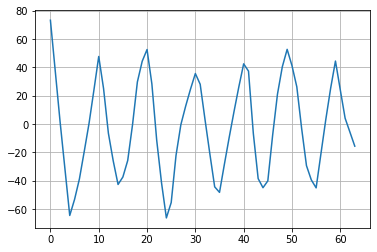

In [142]:
plt.plot(x_new, M_new[2])
plt.grid()
plt.show()

In [143]:
#делаем проеобр Фурье нашей новой большой матрицы
N_new=len(M_new[0])
FS_new=np.zeros((Q, N_new), complex)
for k in range(Q):
    for p in range(N_new):
      res=np.dot(M_new[k], [np.exp((-2)*np.pi*1j*p*n/(N_new)) for n in range(N_new)])
      FS_new[k][p]=res

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


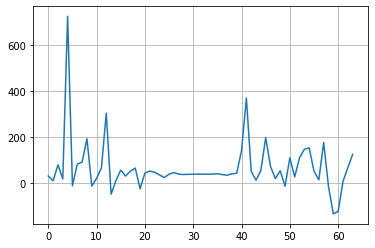

In [144]:
plt.plot(x_new, FS_new[3])
plt.grid()
plt.show()

In [145]:
sum_FS_new=np.zeros((N_new, 1), complex)
for n in range(N_new):
    for k in range(Q):
        sum_FS_new[n]+=FS_new[k][n]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


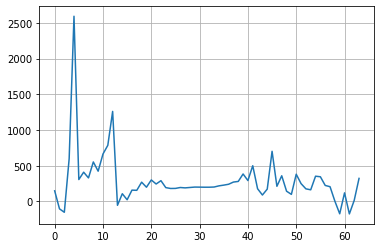

In [146]:
plt.plot(x_new, sum_FS_new)
plt.grid()
plt.show()